# Etivity 2

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Task 1 Fill in the Missing Values

First I will locate the missing values. Then decide, after some profiling, the best method to deal with the missing data.

In [2]:
# Read in data file
df = pd.read_csv('bank_et2.csv')
df_orig = pd.read_csv('bank_et2.csv')

##### Examine the first few data rows and the last few data rows. 

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Even in this small sample I can see that education is NaN for record 1995 - which is a missing value.

In [5]:
# Drop Unamed Column as it is just an ID 
del df['Unnamed: 0']

# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000



List of Missing Values
age           12
job           10
education    104
contact      191
poutcome     454
dtype: int64


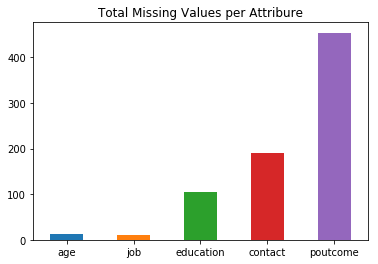

In [6]:
## Count Missing Values per Attribute

# With 2,000 records, we want to see how many have non zero or missing values.

# Count number of each attribute, subtract from total records to determine number of missing vlaues
count_nan = len(df) - df.count()

# List only the attibutes with missing values
missing = count_nan[count_nan!=0]

print("\nList of Missing Values\n======================")
print(missing)

missing.index.tolist()
missing.plot.bar(rot=0)
plt.title("Total Missing Values per Attribure")
plt.show()

So we have 2000 records. But some features have missing or blank entries.

The folowing attributes have missing values:
- age (12 missing - very few)
- job (10 missing - very few)
- education (114 missing - significant)
- contact (191 missing - significant)
- poutcome (454 missing - a lot, almost 25%!!)

Now to fill in missing values I must understand the types and ranges of these values for each attribute, that I can better understand the options for filling in missing values.

Options include:

__Removal__
- If the total records for an attribute is very small, simply deleting the record is an option
- If an attribute has very few records with values na dis mostly NaN, the attribute may be dropped from the records

__Replacement__
- For categorical Values, if there are many missing values we can create a __new category__ called 'unknown' or 'unspecified' to capture this phenomenon
- For numerical values, we can replace with __0, with a mean or a median or the mode__, if a lot of values need to be replaced we don't want to affect the statistical standard deviation
- Instead of imputing the Mean for the full range of the attribute values we can group records using another correlating attribute and calulate the mean for that subset of records - for example if replacing a salary, we can use a separate attribute 'job', and get mean salaries for the different job types and impute the respective mean for the missing salary depending on the 'job' for that record - we can use __Pivot tables__ for this
- We can check, using __correlation__, which attributes inform us about the missing value and impute a suitable one with a linear or logistic regression

When dealing with outliers we can also remove or replace the outlier values with similar strategies, to delete the record with the outlier value or impute using one of the replaceent options

### Missing Values - Age

In [7]:
# Let's see what the arrtibutes with the missing features look like

df[['age','job','education','contact','poutcome']].head(5)

,age,job,education,contact,poutcome
0,32.0,technician,tertiary,cellular,failure
1,39.0,technician,secondary,cellular,failure
2,59.0,retired,secondary,cellular,failure
3,47.0,blue-collar,secondary,cellular,failure
4,54.0,retired,secondary,cellular,failure


So we have categorical and numerical data, it would be good to get the possible catgories and the range of numerical values


In [8]:
# Missing Values for Age

# First let's profile the age spread 
df[['age']].describe()

,age
count,1988.000000
mean,41.753018
std,12.724358
min,18.000000
25%,32.000000
50%,38.000000
75%,50.000000
max,93.000000


D:\Python\Miniconda\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Python\Miniconda\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


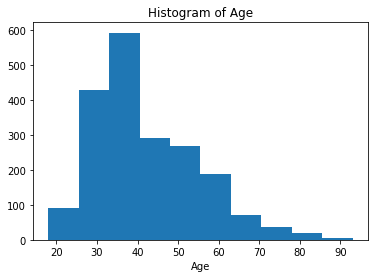

In [9]:
plt.hist(df['age'])
plt.xlabel("Age")
plt.title('Histogram of Age')
plt.show()

We see a good spread of ages with a somewhat long tail. Some sort of mean or normalization could be imputed.

With only 12 missing ages, we could just remove these records or replace witht the mean


__However....__

I would like to compare age to other attributes to see if we can use other attribtes after I do a correlation of features and then use a pivot table of appropriate values to help impute the age more accurately. (see after correlation matrix below)

__to be continued...__

### Missing Values - Contact

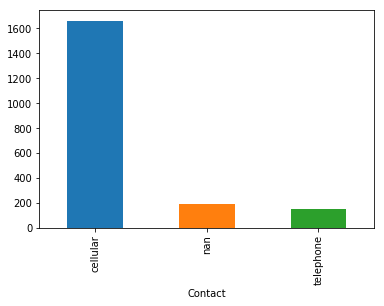

In [10]:
# Review 'contact' attribute

df['contact'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("Contact")
plt.show()

We see contact has mostly 2 types, cellular, which is very popular and others where they have provided a telephone, presumeably a landlne. 
The missing values could be a new category, "no phone" or they simply did not want to provide one or do not have one.

This missing value could be something we want to capture - so  capturing a new value for the attribute called 'no_phone' is a good idea.


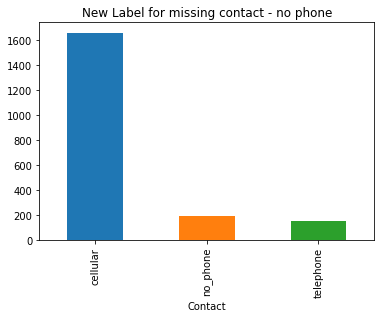

In [11]:
# Replace Missing contact with "no_phone"
df['contact'].fillna("no_phone", inplace=True)

df['contact'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("Contact")
plt.title("New Label for missing contact - no phone")
plt.show()

### Missing Value - poutcome

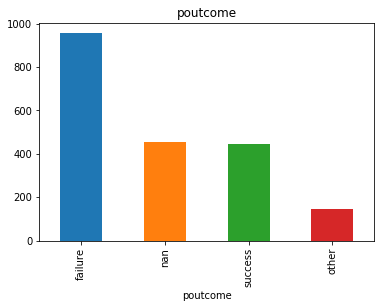

In [12]:
# Review 'poutcome' attribute
df['poutcome'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("poutcome")
plt.title("poutcome")
plt.show()

There are a lot of missing values for poutcome, therefore I will replaced with a new category "none" review attributre correlation with this value.

After correlationm there seems to certainty that this is another use case and should be captured.

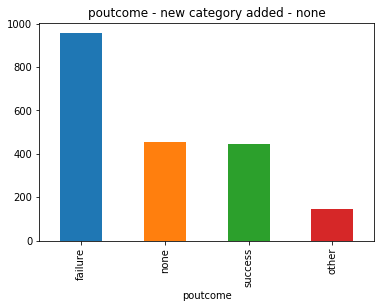

In [13]:
df['poutcome'].fillna("none", inplace=True)

# Review 'poutcome' attribute
df['poutcome'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("poutcome")
plt.title("poutcome - new category added - none")
plt.show()

### Missing Values - Education

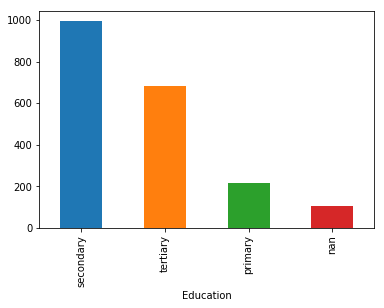

In [14]:
# Review 'education' attribute

df['education'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel("Education")
plt.show()

### Replace Missing Values for Education
'education' has a large number of missing values  (104/2000 ~5%) and I would suggest there is no obvious or mathematical way to assign one of the possible values confidently.

We can first check with correlation whether other attributes indicate which education value should be set to in the case of missing values.

__to be continued...__

### Missing values - Job

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
Name: job, dtype: int64


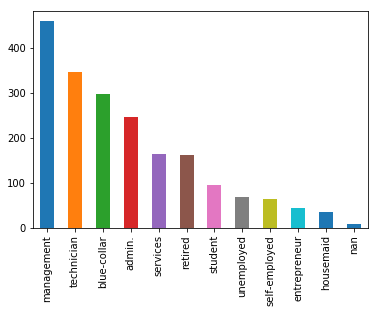

In [15]:
# Handle  for 'job'
jobs = df['job'].value_counts(dropna=False)
print(jobs)
jobs.index.tolist()
jobs.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

There are so few missing values for jobs we can somply drop these records.

In [16]:
df.dropna(subset=['job'], inplace=True)

In [17]:
print("Number of missing jobs: {}".format(df['job'].isna().sum()))

Number of missing jobs: 0


## Corellation Matrix

If we find a correlation we can more confidently replace the value with that indicated by another variable, using a pivot table for example.

If we were replacing more than just 10 missing values, it would be important not to affect the total sample averages and replace in the same percentage as those found in the known values.

To create a correlation matrix first we must change our categorical values to numeric ones.

- For attributes with more than 2 categories, we will need to create dummies.
- For attributes with just 2 categories we can convert from text to 0 and 1


In [18]:
# Calcualte the number of categories for each varible
def attribute_stats(list): 
    for x in list:
        records = df[x].count()
        blank_records = 2000 - records
        print("\n ==== " + x + " - " + str(records) + " records (" + str(blank_records) + " blank) ====")
        print(df[x].value_counts(dropna=False))
        #print(df[x].value_counts(normalize=True))
    
attribute_stats(["job","marital", "education", "default", "housing", "loan", "poutcome", "subscribed", "month"])


 ==== job - 1990 records (10 blank) ====
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

 ==== marital - 1990 records (10 blank) ====
married     1105
single       670
divorced     215
Name: marital, dtype: int64

 ==== education - 1891 records (109 blank) ====
secondary    993
tertiary     683
primary      215
NaN           99
Name: education, dtype: int64

 ==== default - 1990 records (10 blank) ====
no     1975
yes      15
Name: default, dtype: int64

 ==== housing - 1990 records (10 blank) ====
no     1029
yes     961
Name: housing, dtype: int64

 ==== loan - 1990 records (10 blank) ====
no     1740
yes     250
Name: loan, dtype: int64

 ==== poutcome - 1990 records (10 blank) ====
failure    951
none       451
success    441
other      147
Name: poutcome, dtype: int64

 ==== 

### Feature Creation - Transform categorical values to numeric

From this exercise we can see the following are 2 category attributes:
- default
- housing
- loan
- contact
- subscribed

For 'month' we can convert the month name to a month number.

For attributes with multiple categorical values, we will replace with new independent dummy variables.
- job
- marital
- education
- poutcome

For example:

__marital__ has 3 possible values, married, divorced & single
To create dummy attributes we create 3 new binary attrbiutes (marital_single, marital_married, marital_divorced), one for each category and set it to 0 or 1 to indicate which marital status is valid.
We could remove one of the dummy attributes, as all zeros in the rest of these would be the same as 1 in that final dummy attribute. But for the purpose of the correlation table we will keep it to be able to show any direct correlation with each marital status.



### Feature - Convert binary categorical values to numerical binary values

In [19]:
# Convert these 2 category attributes to 1 and 0 to aid correlation

df['default'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['housing'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['loan'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['contact'].replace(to_replace=['cellular', 'telephone'], value=[0, 1],inplace=True)
df['subscribed'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)

### Feature Creation - Transform month names to month number

In [20]:
# Covert Month 3 letter to number
df['month'].replace(to_replace=['jan', 'feb', 'mar', 'apr', 'may','jun',
                               'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                                value=[1, 2,3,4,5,6,7,8,9,10,11,12], inplace=True)

### Feature Creation - Convert job types to independent attributes

#### Dummies - Job

In [21]:
# create dummies for 'job'
df_dummies = pd.get_dummies(df['job'], prefix='job')
# don't delete supurfluous categry as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df = pd.concat([df, df_dummies], axis=1)
# no need to remove surpurfluous columns just yet
# del df['job']

#### Dummies - Marital Status

In [22]:
# Create dummies for 'marital'
df_dummies = pd.get_dummies(df['marital'], prefix='marital')
# don't delete supurfluous categry as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df = pd.concat([df, df_dummies], axis=1)
# del df['marital']

#### Dummies - Education

In [23]:
# create dummies for 'education'
df_dummies = pd.get_dummies(df['education'], prefix='education')
# don't delete supurfluous category as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df = pd.concat([df, df_dummies], axis=1)
# no need to remove surpurfluous columns just yet
# del df['education']

#### Dummies - poutcome

In [24]:
# create dummies for 'education'
df_dummies = pd.get_dummies(df['poutcome'], prefix='poutcome')
# don't delete supurfluous category as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df = pd.concat([df, df_dummies], axis=1)
# del df['poutcome']

In [25]:
### View new attributes and sample values
df.head(1).T

,0
age,32
job,technician
marital,single
education,tertiary
default,0
balance,392
ratio_bal_ln,1.30013
ratio_ln_inc,0.473895
housing,1
loan,0


In [26]:
# Confirm we remaining missing values for our attributes
df.apply(lambda x: sum(x.isnull()), axis=0)

age                    12
job                     0
marital                 0
education              99
default                 0
balance                 0
ratio_bal_ln            0
ratio_ln_inc            0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
subscribed              0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         0
marital_single          0
education_primary       0
education_secondary     0
education_tertiary      0
poutcome_failure        0
poutcome_none           0
poutcome_oth

In [27]:
correlation_matrix = df.corr()

#correlation_matrix_abs = correlation_matrix.abs()

print(correlation_matrix)

                          age   default   balance  ratio_bal_ln  ratio_ln_inc  \
age                  1.000000 -0.009038  0.140472     -0.025167      0.058788   
default             -0.009038  1.000000 -0.044084      0.048203     -0.040291   
balance              0.140472 -0.044084  1.000000     -0.079678      0.104229   
ratio_bal_ln        -0.025167  0.048203 -0.079678      1.000000     -0.220966   
ratio_ln_inc         0.058788 -0.040291  0.104229     -0.220966      1.000000   
housing             -0.110442  0.008793 -0.126634      0.265497     -0.262688   
loan                -0.006023  0.072146 -0.069915      0.125147     -0.113414   
day                  0.044310 -0.006127  0.037044     -0.075540      0.050914   
month                0.041830 -0.039517  0.077213     -0.297815      0.285416   
duration             0.076334 -0.059550  0.097487     -0.208547      0.163634   
campaign            -0.003118 -0.002865  0.025060     -0.008695     -0.003068   
pdays                0.01026

[35 rows x 35 columns]


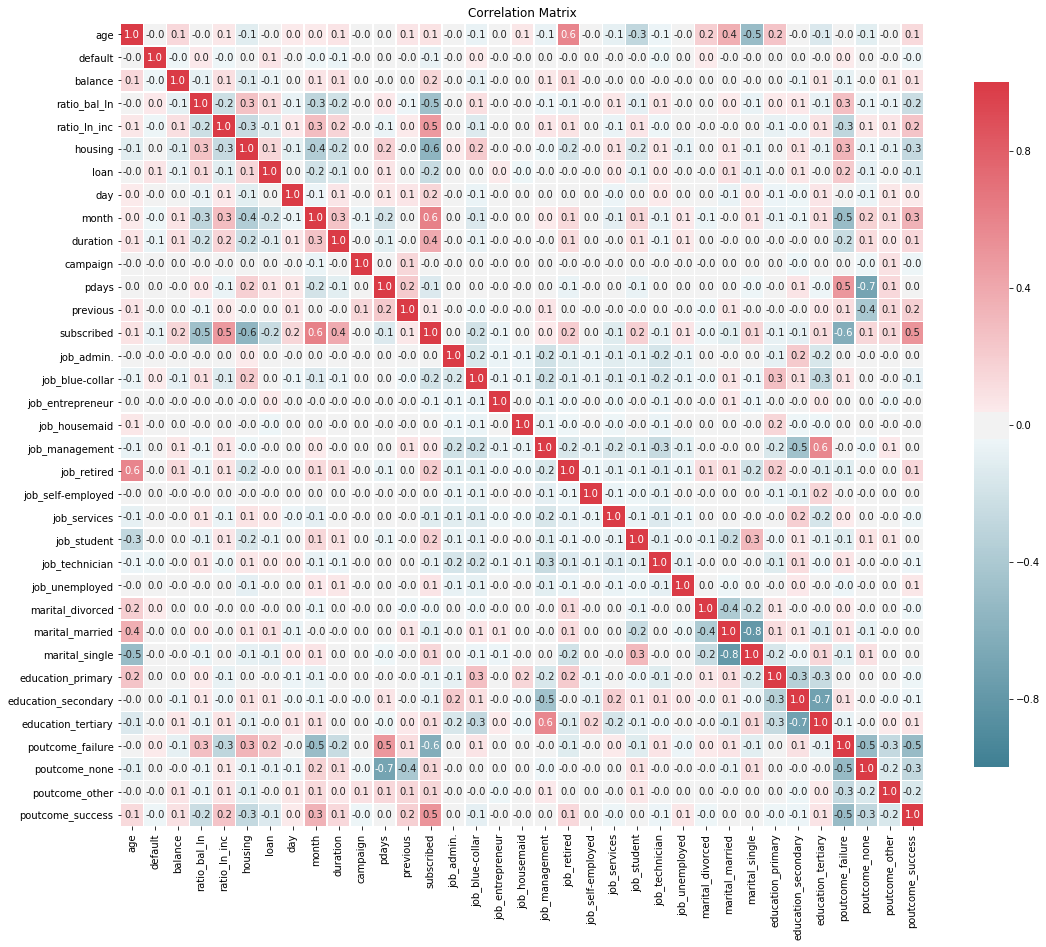

In [28]:
# Generate a mask for the upper triangle
#correlation_matrix = df.corr()

#mask = np.zeros_like(correlation_matrix, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .7},  annot=True, fmt='0.1f')
plt.title("Correlation Matrix")
plt.show()

## Missing Value Solutions

We are looking at the attributes that have missing values.

If we look at correlation between these attributes and other attributes - a strong correlation will help us fill in missing values by using this trait.

The prefix ensures I don't attempt to correlate dummies from the same original attribute, which would be correlated but only because they are from the same attribute.

If there is no strong correlation, we can remove the records or replace with other means.

## age
12 missing values

__Results:__ 
We see there is a strong correlation to 'job' = 'retired' & slightly less so 'job' = 'student'
Also we see a correlation with 'marital' = single
Using this information we can fill records with 'retired' with the upper age bracket,
'student' or 'single' with a lower value and the rest with the median.

__Solution:__
Although there are only 12 missing values for age I will replace these for the mean of their assciated sub sgorpuing of Marital Status and Education.
I created a pivot table for this below and replace. __Solution Below__


## job
10 missing values
<admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed>

__Results:__ 
No major correlation with any attributes other than age and 'retired' mentioned above
This is now a candidate for removal of records, or have 'retired' for this with the appropriate higher age.

__Solution:__
As there are so few records with missing values, and the easiest option is to remove these records.

## education
104 missing values
<primary, secondary, tertiary>

__Results:__ 
As there are a lot of missing values, we want to identify a strategy to replace these.
We see primary somewhat tied to age, presumably younger - so if we have a young agge we could replace missing with 'primary' with confidence.
We see stronger correlation with secondary and tertiary for 'job' = 'management' split between them. 
So it would be hard to decide which, as tertiary is only slightly more, we may need another attribute to help decide between the 2 options.

__Solution:__
Pivot table for education against 'job' and 'age'  __Solution Below__

## contact
191 missing values
<telephone, cellular>

__Results:__ 
As there are a lot of missing values, we want to identify a strategy to replace these.
We see No real correlation, and only slightly with age. 
Without strong correlation we can add a separate category for 'none' for 'contact'

__Solution:__
As there are so many records with a missing value, and I have included it as its own new categort - 'no_phone'. in  case this fact is relevant to the target outcome.

## poutcome
454 missing vaues
<success, failure, other>
As there are a lot of missing values, we want to identify a strategy to replace these.

We also see a correlation between 'pdays' and 'poutcome'='none' (previoulsy the missing value indicator)

We see a strong correlation with 'subscribed' - this can help us select 'success' (29%) or 'failure' (62%). 
We also see a correlation between 'month' and 'poutcome'
We also see a correlation between 'housing' and 'poutcome'

The 'other' value for poutcome is a lower percentage option (<10%). 
See below for percentages of 'poutcome' provided values - and perhaps we can determine a replacement strategy.

The other option is to create a new category for this - 'unknown' as this may be a separate use case not immediately obvious and replacing with known values may hide this fact.

__Solution:__

We replace with a new category 'none' which indicates the new use case

### Replace Missing Values for Age with Pivot Table (marital status & education)

Text(0.5, 0.98, '')

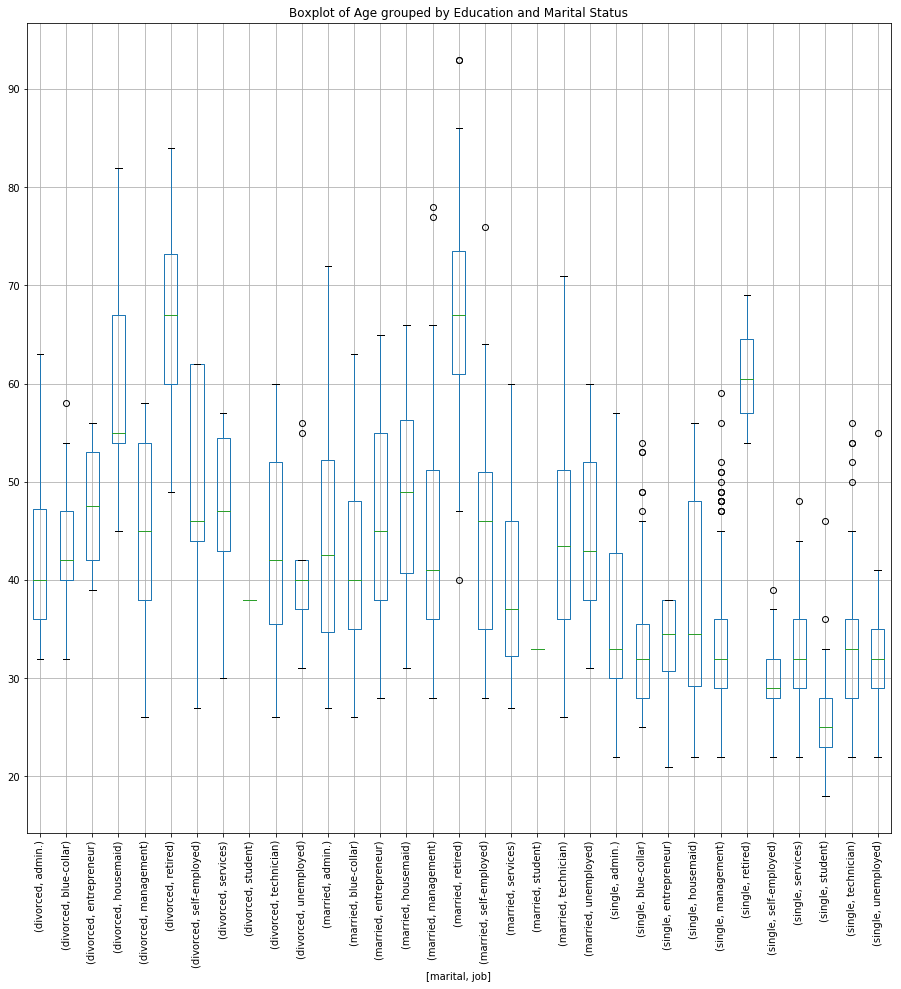

In [29]:
# Boxplot of Age with reference to two correlated attributes Job and Marital Status
df.boxplot(column='age', by=['marital','job'], rot=90, figsize=(15,15))
plt.title("Boxplot of Age grouped by Education and Marital Status")

plt.suptitle("")

In [30]:
table = df.pivot_table(values='age', 
                       index='marital', 
                       columns='job', 
                       aggfunc=np.median)
print(table)

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced    40.0         42.0          47.5       55.0        45.0     67.0   
married     42.5         40.0          45.0       49.0        41.0     67.0   
single      33.0         32.0          34.5       34.5        32.0     60.5   

job       self-employed  services  student  technician  unemployed  
marital                                                             
divorced           46.0      47.0     38.0        42.0        40.0  
married            46.0      37.0     33.0        43.5        43.0  
single             29.0      32.0     25.0        33.0        32.0  


In [31]:
print("\nNumber of Missing Ages\n======================")
print(df['age'].isna().sum())


Number of Missing Ages
12


In [32]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['marital'], x['job']]

# Replace missing values
if (df['age'].isna().sum()>0):
    df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

print("\n replaced missing ages from pivot of 'job' and 'marital' status")


 replaced missing ages from pivot of 'job' and 'marital' status


In [33]:
print("\nNumber of Missing Ages\n======================")
print(df['age'].isna().sum())


Number of Missing Ages
0


### Feature Creation - Age Group

In [34]:
# Create new categorical attribute to represent age - inspiration Abhjit Sinha
age_group_names = ['youth', 'adult', 'middleaged', 'oap']

# Break the age groups into 4 parts and assign group names
df['age_group'] = pd.qcut(df['age'], 4, labels = age_group_names)
df['age_group'].value_counts(dropna=False)

youth         518
middleaged    501
adult         489
oap           482
Name: age_group, dtype: int64

In [35]:
# Create Pivot Table
# Need to drop null values as they can cause issues
df_for_table = df.dropna(subset=['education'])

table = df_for_table.pivot_table(values='education', index='job', columns='age_group',  aggfunc=lambda x: x.mode().iat[0])
print(table)

age_group          youth      adult middleaged        oap
job                                                      
admin.         secondary  secondary  secondary  secondary
blue-collar    secondary  secondary  secondary    primary
entrepreneur    tertiary  secondary   tertiary   tertiary
housemaid       tertiary  secondary    primary    primary
management      tertiary   tertiary   tertiary   tertiary
retired              NaN        NaN    primary  secondary
self-employed   tertiary   tertiary   tertiary   tertiary
services       secondary  secondary  secondary  secondary
student        secondary  secondary        NaN        NaN
technician     secondary  secondary  secondary  secondary
unemployed     secondary  secondary  secondary  secondary


In [36]:
# Code to replace based on Pivot Table

# Define function to return an element of the pivot table

def get_element(x):
    #print ("Replacing record of {}, {} with {}".format(x['job'], x['age_group'], table.loc[x['job'], x['age_group']]))
    return table.loc[x['job'], x['age_group']]


# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(get_element, axis=1), inplace=True)

# From table above, I see I could still have NaN for some combinations so I wil replace these also with 'secondary' as the mode
df['education'].fillna('secondary', inplace=True)


In [37]:
print(df['education'].value_counts(dropna=False,normalize=True))

secondary    0.535176
tertiary     0.355779
primary      0.109045
Name: education, dtype: float64


# Task 2 Outliers

In [38]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_none,poutcome_other,poutcome_success,age_group
0,32.0,technician,single,tertiary,0,392,1.300134,0.473895,1,0,...,0,1,0,0,1,1,0,0,0,youth
1,39.0,technician,divorced,secondary,0,688,-0.193701,0.237021,1,1,...,0,0,0,1,0,1,0,0,0,middleaged
2,59.0,retired,married,secondary,0,1035,1.334266,0.121981,1,1,...,1,0,0,1,0,1,0,0,0,oap
3,47.0,blue-collar,married,secondary,0,398,0.362286,1.251328,1,1,...,1,0,0,1,0,1,0,0,0,middleaged
4,54.0,retired,married,secondary,0,1004,0.072075,-0.533738,1,0,...,1,0,0,1,0,1,0,0,0,oap


So ignoring categorical values, we have some numerical ones.
- balance
- ratio_bal_in
- ratio_ln_inc
- duration
- campaign
- pdays
- previous

So let's get some view of these items

In [39]:
df[['balance','ratio_bal_ln','ratio_ln_inc','duration','pdays','previous']].describe()

,balance,ratio_bal_ln,ratio_ln_inc,duration,pdays,previous
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,1414.038191,0.246348,0.484151,291.302513,167.782915,2.564322
std,3138.455806,0.819399,1.075702,220.505890,131.189454,3.405794
min,-980.000000,-2.632068,-2.851405,7.000000,-1.000000,0.000000
25%,199.000000,-0.304435,-0.276613,146.000000,76.250000,1.000000
50%,549.000000,0.225843,0.487082,236.000000,182.000000,2.000000
75%,1634.750000,0.811116,1.210057,375.750000,251.000000,3.000000
max,81204.000000,2.961979,4.046914,1823.000000,854.000000,55.000000


### Outliers - Balance

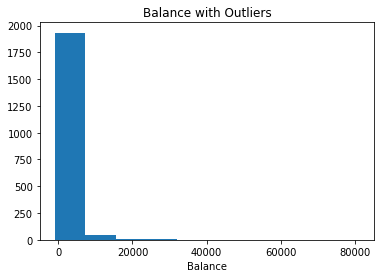

In [40]:
plt.hist(df['balance'])
plt.xlabel("Balance")
plt.title("Balance with Outliers")
plt.show()

Extreme outlier, I create a standard deviation method to remove this large one and ones too low.

In [41]:
def remove_outliers_3std(dataset, attribute):
    # calculate ratio_bal_ln statistics
    data_mean, data_std = dataset[attribute].mean(), dataset[attribute].std()
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    # Drop ratio_bal_ln outside 3 stadard deviations (98%)
    return dataset[(dataset[attribute]>=lower) & (dataset[attribute] <= upper)]

In [42]:
df = remove_outliers_3std(df,'balance')

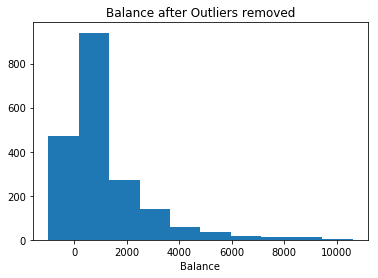

In [43]:
plt.hist(df['balance'])
plt.xlabel("Balance")
plt.title("Balance after Outliers removed")
plt.show()

### Outliers - ratio_bal_ln

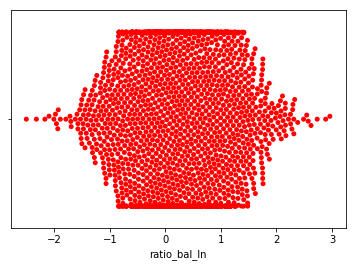

In [44]:
sns.swarmplot(x=df['ratio_bal_ln'], color='red')
plt.show()

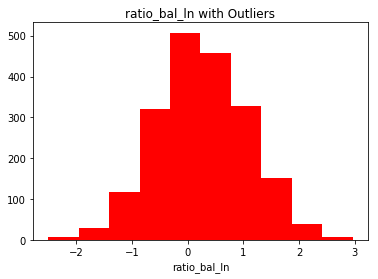

In [45]:
plt.hist(df['ratio_bal_ln'], color='red')
plt.xlabel("ratio_bal_ln")
plt.title("ratio_bal_ln with Outliers")
plt.show()

In [46]:
df = remove_outliers_3std(df, 'ratio_bal_ln')

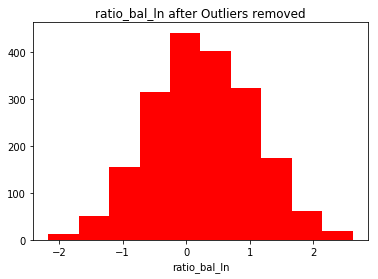

In [47]:
plt.hist(df['ratio_bal_ln'], color='red')
plt.xlabel("ratio_bal_ln")
plt.title("ratio_bal_ln after Outliers removed")
plt.show()

We can see a small reduction in width/range of the attribute after outliers removed

### Outliers - ratio_ln_inc

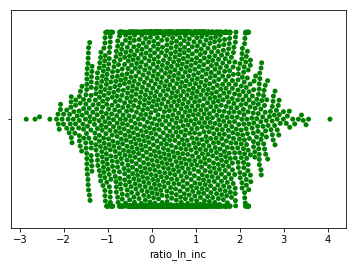

In [48]:
sns.swarmplot(x=df['ratio_ln_inc'], color='green')
plt.show()

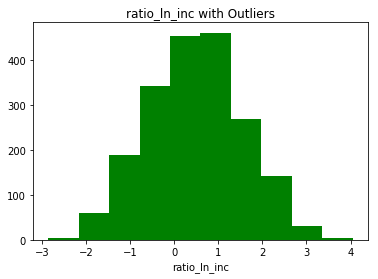

In [49]:
plt.hist(df['ratio_ln_inc'], color='green')
plt.xlabel("ratio_ln_inc")
plt.title("ratio_ln_inc with Outliers")
plt.show()

In [50]:
df = remove_outliers_3std(df, 'ratio_ln_inc')

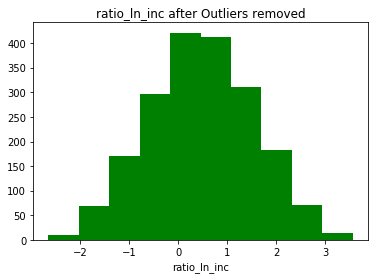

In [51]:
plt.hist(df['ratio_ln_inc'], color='green')
plt.xlabel("ratio_ln_inc")
plt.title("ratio_ln_inc after Outliers removed")
plt.show()

### Outliers - duration

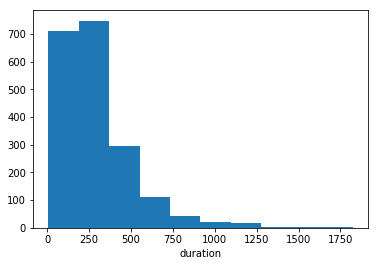

In [52]:
# View duration attribute
plt.hist(df['duration'])
plt.xlabel("duration")
plt.show()

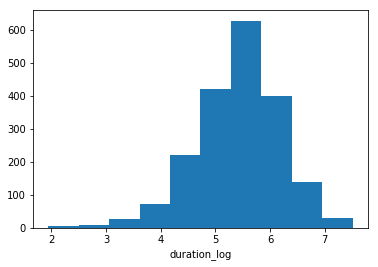

In [53]:
# Looks skewed so we perform a log transformation to lessen the effect of the outliers
df['duration_log'] = np.log(df['duration'])

plt.hist(df['duration_log'])
plt.xlabel("duration_log")
plt.show()

In [54]:
# The remove outliers outside 3 std
df = remove_outliers_3std(df, 'duration_log')

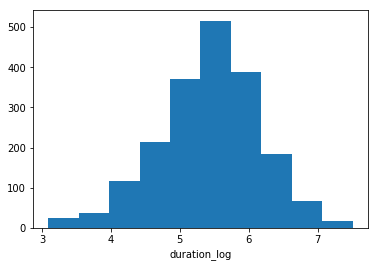

In [55]:
# Final plot - looks good
plt.hist(df['duration_log'])
plt.xlabel("duration_log")
plt.show()

### Outliers - campaign

In [56]:
df['campaign'].value_counts()

1     1034
2      491
3      216
4       97
5       47
6       27
7       12
8        6
9        4
11       3
Name: campaign, dtype: int64

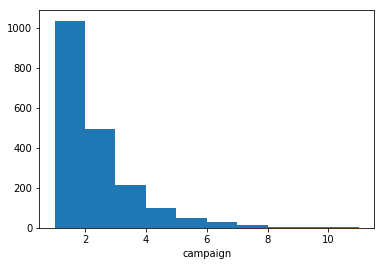

In [57]:
# View campaign attribute

plt.hist(df['campaign'])
plt.xlabel("campaign")
plt.show()

Outliers have a long tail. Also these seem to be a dicreet value, the number of campaign attempts perhaps.

In [58]:
# The remove final outliers outside 3 std
df = remove_outliers_3std(df, 'campaign')

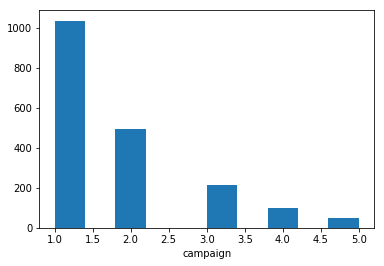

In [59]:
plt.hist(df['campaign'])
plt.xlabel("campaign")
plt.show()

In [60]:
# After removing 2% outliers we see a much reduced number of options
df['campaign'].value_counts()

1    1034
2     491
3     216
4      97
5      47
Name: campaign, dtype: int64

### Outliers - pdays

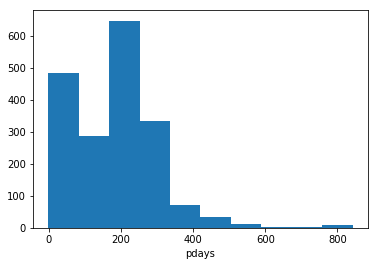

In [61]:
# print(df['pdays'].loc[df['poutcome']=="other"])

plt.hist(df['pdays'])
plt.xlabel("pdays")
plt.show()

We noted the pdays with values -1 correlate exactly with poutcome = none (previously NaN)

# Task 3 - Feature Creation
We have balance

We have a ration of balance to loan

We have a ratio of loan to income

So we should be able to calculate both income and loan and also se the net position of that person (balance - loan)

As the rtions were the most important attributes from Etivity 1 for target subscribed - it would be good to check these combined attributes as well once generated.


### Feature Creation - Loan from Balance (ratio_bal_ln)

balance/loan = ratio_bal_ln
=> balance/ratio_bal_ln = loan

In [62]:
#df[['balance','ratio_bal_ln','ratio_ln_inc']].iloc(df.ratio_bal_ln<0)

df['loan_amount'] = df['balance']/df['ratio_bal_ln']
df[['balance','ratio_bal_ln','ratio_ln_inc','loan_amount']].head(20)

#,'ratio_ln_inc']].head()
#loc[df['ratio_bal_ln'] <0]

,balance,ratio_bal_ln,ratio_ln_inc,loan_amount
0,392,1.300134,0.473895,301.507285
1,688,-0.193701,0.237021,-3551.861088
2,1035,1.334266,0.121981,775.707385
3,398,0.362286,1.251328,1098.580949
4,1004,0.072075,-0.533738,13929.893510
5,926,0.233619,0.922197,3963.723150
6,1924,0.022648,0.724227,84952.880073
7,396,-0.724889,-0.998605,-546.290570
8,315,0.502131,-0.045391,627.326201
10,715,1.079459,-1.642914,662.368959


It is not clear what a negative ratio indicates and therefore a negative loan value.

### Feature Creation - Income  from Loan (ratio_ln_inc)

In [63]:
df['income'] = df['loan_amount']/df['ratio_ln_inc']
df[['balance','ratio_bal_ln','ratio_ln_inc','loan_amount','income']].head(20)


,balance,ratio_bal_ln,ratio_ln_inc,loan_amount,income
0,392,1.300134,0.473895,301.507285,636.232091
1,688,-0.193701,0.237021,-3551.861088,-14985.420993
2,1035,1.334266,0.121981,775.707385,6359.237720
3,398,0.362286,1.251328,1098.580949,877.931808
4,1004,0.072075,-0.533738,13929.893510,-26098.772159
5,926,0.233619,0.922197,3963.723150,4298.129487
6,1924,0.022648,0.724227,84952.880073,117301.463806
7,396,-0.724889,-0.998605,-546.290570,547.053734
8,315,0.502131,-0.045391,627.326201,-13820.562951
10,715,1.079459,-1.642914,662.368959,-403.167146


It is not clear what a negative ratio indicates and therefore a negative income value.

### Feature Creation - Net Position = Balance - Loan

In [64]:
df['net_position'] = df['balance']- df['loan_amount']
df[['balance','ratio_bal_ln','ratio_ln_inc','loan_amount','income','net_position','job','age']]
#.loc[(df['job']=='management') & (df['ratio_bal_ln']>0)]
# incomes = df['income'].loc[(df['job']=='technician')]


,balance,ratio_bal_ln,ratio_ln_inc,loan_amount,income,net_position,job,age
0,392,1.300134,0.473895,301.507285,6.362321e+02,90.492715,technician,32.0
1,688,-0.193701,0.237021,-3551.861088,-1.498542e+04,4239.861088,technician,39.0
2,1035,1.334266,0.121981,775.707385,6.359238e+03,259.292615,retired,59.0
3,398,0.362286,1.251328,1098.580949,8.779318e+02,-700.580949,blue-collar,47.0
4,1004,0.072075,-0.533738,13929.893510,-2.609877e+04,-12925.893510,retired,54.0
5,926,0.233619,0.922197,3963.723150,4.298129e+03,-3037.723150,self-employed,46.0
6,1924,0.022648,0.724227,84952.880073,1.173015e+05,-83028.880073,blue-collar,34.0
7,396,-0.724889,-0.998605,-546.290570,5.470537e+02,942.290570,services,45.0
8,315,0.502131,-0.045391,627.326201,-1.382056e+04,-312.326201,management,58.0
10,715,1.079459,-1.642914,662.368959,-4.031671e+02,52.631041,management,38.0



# Task 4.1  Perform Classificaiton - with Logistic Regression

In [66]:
# Prepare Simple Data Set of attributes (2 attributes)
simple_fields = ['ratio_bal_ln','ratio_ln_inc']
X = df[simple_fields]
y = df['subscribed']

X.head(5)

,ratio_bal_ln,ratio_ln_inc
0,1.300134,0.473895
1,-0.193701,0.237021
2,1.334266,0.121981
3,0.362286,1.251328
4,0.072075,-0.533738


In [67]:
# Normalize Values to make it easier for the model to work
X[simple_fields] = X[simple_fields].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X.head(5)

D:\Python\Miniconda\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,ratio_bal_ln,ratio_ln_inc
0,0.724050,0.503207
1,0.412405,0.465079
2,0.731170,0.446562
3,0.528396,0.628343
4,0.467852,0.341017


### 4.1 Logistical Regresion

In [68]:
# Split the Samples into a training and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
logistical_regresion_model = LogisticRegression(solver='lbfgs', n_jobs=2)

# Fit to dataset
logistical_regresion_model.fit(X_train, y_train)

# Ein on train data: 1 - log_reg_score(train)
Ein = 1 - logistical_regresion_model.score(X_train, y_train)

# Eout on test data: 1 - log_reg_score(test)
Eout = 1 - logistical_regresion_model.score(X_test, y_test)

print("Ein:  {:.2f}".format(Ein))
print("Eout: {:.2f}".format(Eout))

Ein:  0.22
Eout: 0.20


### 4.3 Generate Plots
- P[|Ein - Eout|>e]
- Hoeffding Bound
- VC Bound

In [69]:
def show_graph(ein, eout, model_name, N, dvc):
    error_diff = abs(np.array(ein)-np.array(eout))
    epsilons = np.arange(0.001,0.20,0.001)
    prob_epsilon=[]
    for e in epsilons:
            prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
    
    f, ax = plt.subplots(figsize=(9, 7.5))
    plt.plot(epsilons, prob_epsilon, label="P|ein-eout|>e")

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
    vc = [4*((2*N)**dvc+1)*math.exp(-(N/8)*e**2) for e in epsilons]

    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
    plt.plot(epsilons, hoef,'r', label="Hoeffding's Inequality")
    plt.plot(epsilons, vc, 'g', label="VC Bound")
    plt.yscale('log')
    plt.legend(loc="best")
    plt.title(model_name)
    plt.show()

In [70]:
import datetime

# Experiment with estimator
def run_experiment(X, y, model, number_of_runs, model_name):
#    log_every_n = 500
    ein = []
    eout = []
    for i in range(number_of_runs):
#         if (i % log_every_n) == 0:
#             print("{} iteration {}".format(datetime.datetime.now(), i))
        # Split the data in to train and test (80/20 split) ensure the data is shuffled.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
        model.fit(X_train, y_train)
        ein.append(1 - model.score(X_train, y_train))
        eout.append(1 - model.score(X_test, y_test))
    N = len(X_train)
    dvc = (X_train.shape[1]) + 1
    model_name += " - N = " + str(N) + " - dvc = " + str(dvc)
    show_graph(ein, eout, model_name, N, dvc)
    return ein,eout

In [71]:
logistical_regresion_model = LogisticRegression(solver='lbfgs', n_jobs=2)

Error exceeds Hoeffding
Error does not exceed VC


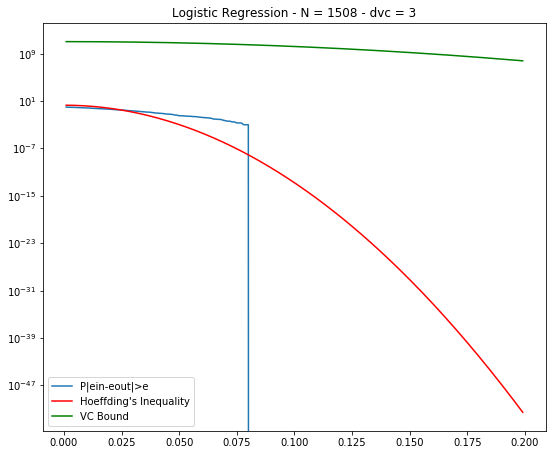

In [72]:
# Run the Logistical Regresion Model with 500 repeats
repeats = 1000

ein, eout = run_experiment(X, y, logistical_regresion_model, repeats, "Logistic Regression")

In [73]:
# Prepare Complex data with 6 attributes
complex_fields = ["age", "loan_amount", "ratio_bal_ln", "ratio_ln_inc", "duration_log", "pdays"]
X_complex = df[complex_fields].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_complex.head(5)

,age,loan_amount,ratio_bal_ln,ratio_ln_inc,duration_log,pdays
0,0.186667,0.686158,0.724050,0.503207,0.854108,0.156584
1,0.280000,0.684057,0.412405,0.465079,0.534275,0.158956
2,0.546667,0.686417,0.731170,0.446562,0.395101,0.284698
3,0.386667,0.686593,0.528396,0.628343,0.570970,0.283511
4,0.480000,0.693589,0.467852,0.341017,0.697424,0.365362


Error exceeds Hoeffding
Error does not exceed VC


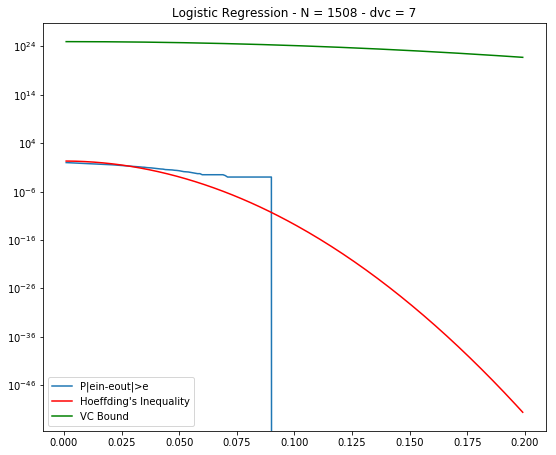

In [74]:
repeats = 1000

ein, eout = run_experiment(X_complex, y, logistical_regresion_model, repeats, "Logistic Regression")

Learning relies on the fact that out in sample error will match closely the out of sample error.
If we can bound this possibility then we can say learning is posible.

We see that the Hoeffding Bound can be crossed with many samples, but not the VC bound.

Though it is still a large bound, the fact it it a finite bound assists in proving learning is possible for all hypotheses.

# Task 5 - Other Models

## SVC - 3 Types (Linear, RBF & Poly)

Error exceeds Hoeffding
Error does not exceed VC


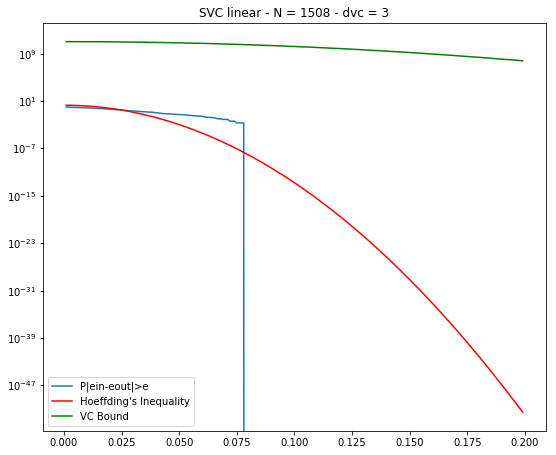

Error exceeds Hoeffding
Error does not exceed VC


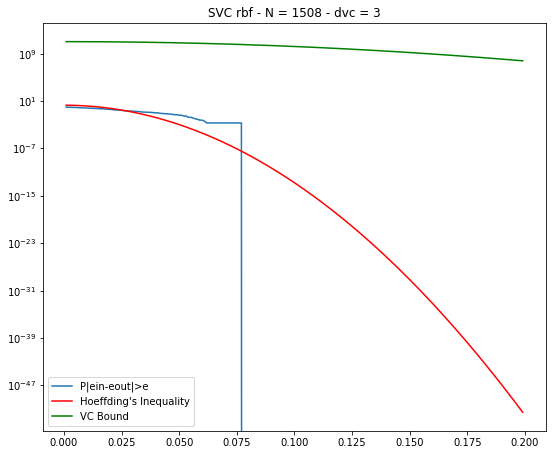

Error exceeds Hoeffding
Error does not exceed VC


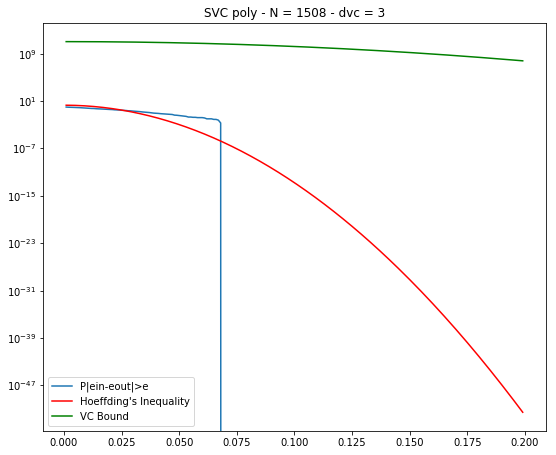

In [75]:
from sklearn import svm

repeats = 500

for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    svc_model = svm.SVC(kernel=kernel, gamma=10)
    model_name = "SVC " + kernel
    run_experiment(X, y, logistical_regresion_model, repeats, model_name)


# Task 5 - Learning Curves

In [76]:
# Adapted from code on https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# https://scikit-learn.org/stable/modules/learning_curve.html


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.kernel_ridge import KernelRidge

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Data Points, N")
    plt.ylabel("Expected Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Ein")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
             label="Eout")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Python\\Miniconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

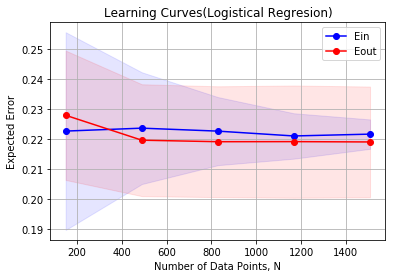

In [77]:
# We have X and y defined

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


title = "Learning Curves(Logistical Regresion)"
plot_learning_curve(logistical_regresion_model, title, X, y, cv=cv, n_jobs=4)

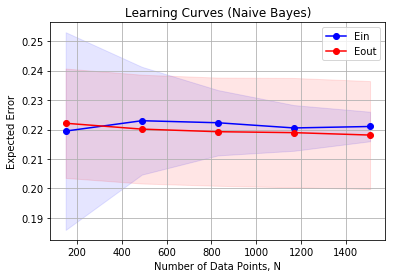

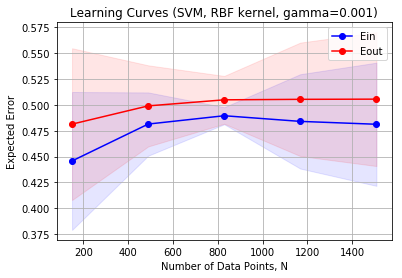

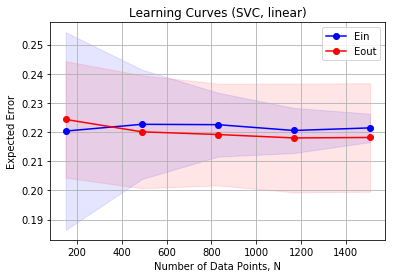

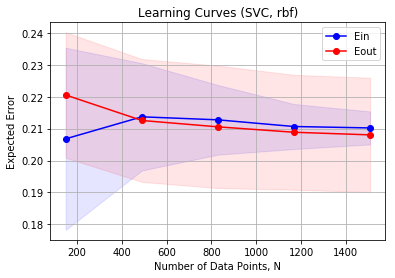

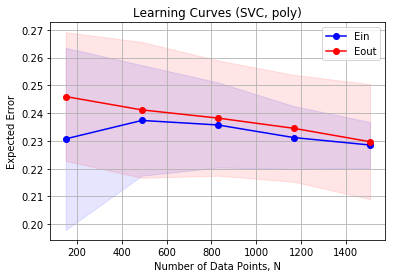

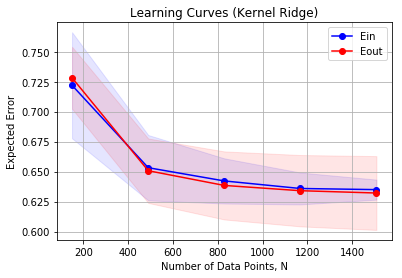

In [78]:
title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y,  cv=cv, n_jobs=4)


title = "Learning Curves (SVM, RBF kernel, gamma=0.001)"
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


title="Learning Curves (SVC, linear)"
svc_model1 = svm.SVC(kernel='linear', gamma=10)
plot_learning_curve(svc_model1, title, X, y, cv=cv, n_jobs=4)


title="Learning Curves (SVC, rbf)"
svc_model2 = svm.SVC(kernel='rbf', gamma=10)
plot_learning_curve(svc_model2, title, X, y, cv=cv, n_jobs=4)


title="Learning Curves (SVC, poly)"
svc_model3 = svm.SVC(kernel='poly', gamma=10)
plot_learning_curve(svc_model3, title, X, y, cv=cv, n_jobs=4)

title="Learning Curves (Kernel Ridge)"
kr = KernelRidge(kernel='rbf', gamma=0.1)
plot_learning_curve(kr, title, X, y, cv=cv, n_jobs=4)
plt.show()

In [79]:
df.head(1).T

,0
age,32
job,technician
marital,single
education,tertiary
default,0
balance,392
ratio_bal_ln,1.30013
ratio_ln_inc,0.473895
housing,1
loan,0


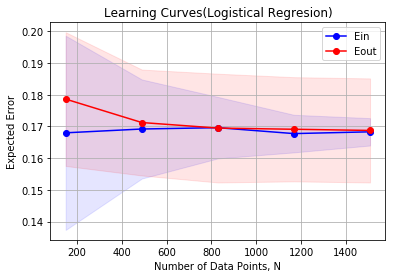

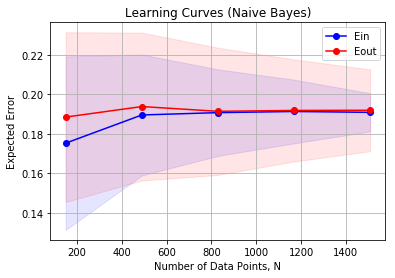

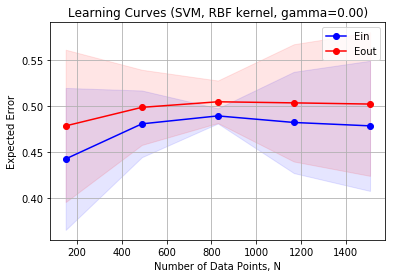

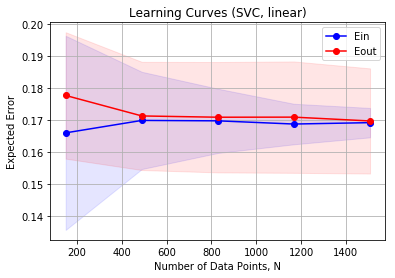

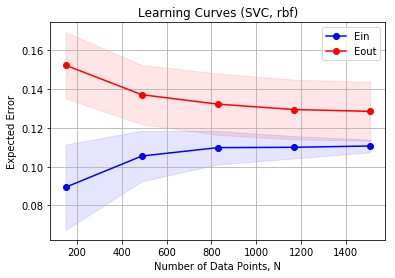

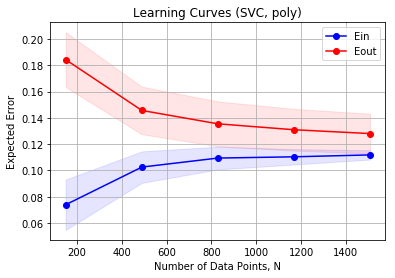

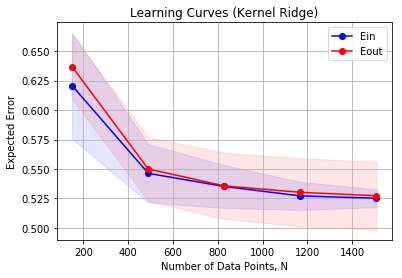

In [80]:
# Plot Learning Curves for same models but with many more attributes (more complexity)
title = "Learning Curves(Logistical Regresion)"
plot_learning_curve(logistical_regresion_model, title, X_complex, y, cv=cv, n_jobs=4)

title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X_complex, y,  cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, gamma=0.00)"
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X_complex, y, cv=cv, n_jobs=4)

title="Learning Curves (SVC, linear)"
svc_model1 = svm.SVC(kernel='linear', gamma=10)
plot_learning_curve(svc_model1, title, X_complex, y, cv=cv, n_jobs=4)

title="Learning Curves (SVC, rbf)"
svc_model2 = svm.SVC(kernel='rbf', gamma=10)
plot_learning_curve(svc_model2, title, X_complex, y, cv=cv, n_jobs=4)

title="Learning Curves (SVC, poly)"
svc_model3 = svm.SVC(kernel='poly', gamma=10)
plot_learning_curve(svc_model3, title, X_complex, y, cv=cv, n_jobs=4)

title="Learning Curves (Kernel Ridge)"
kr = KernelRidge(kernel='rbf', gamma=0.1)
plot_learning_curve(kr, title, X_complex, y, cv=cv, n_jobs=4)
plt.show()

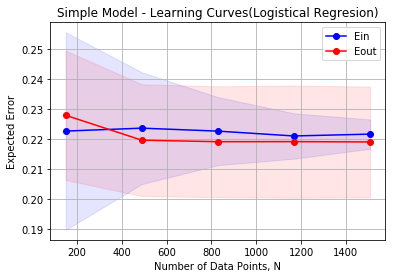

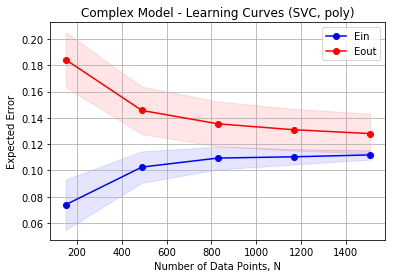

In [81]:
# Simple model
title = "Simple Model - Learning Curves(Logistical Regresion)"
plot_learning_curve(logistical_regresion_model, title, X, y, cv=cv, n_jobs=4)

# Complex Model
title="Complex Model - Learning Curves (SVC, poly)"
svc_model3 = svm.SVC(kernel='poly', gamma=10)
plot_learning_curve(svc_model3, title, X_complex, y, cv=cv, n_jobs=4)
plt.show()

We can see with the complex models (which introduce more variance) that with increased number of samples for training that the Training Score decreases (Ein increases) but the out of sample scores improve (Eout decreases) and the generalization error decreases and the model covnverges (VC analysis).

### Simple model (Logistic Regression with 2 data attributes)

On the simple model the Error stays at 0.22 from early on (in sample count) so Ein and Eout immediatly converge and has a higher initial and final performance compared to the complex model. 

We note pretty static performance, despite adding data samples.

### Complex model -  SVC(rbf) with 10 data attributes


On the Complex Model the Ein starts very low and increases with increased data samples.
The Eout starts high with litte data and reduces with additional data.
The guideline is 10 times x VDC for good generalization. VDC is 11 for this complex model, therefore we exect convergence at 1100 samples. 

Looking at the Complex Model graph we see convergence flatten around this point on the graph (1100 samples).

The final error of the Complex Model is better than the Simple Model at 0.12 compared to 0.22 for the Simple Model,.

The final performance is better than the simple model, it takes more samples before the model converges, between Ein and Eout.

The simple model converges right away but has less room to improve.

